<a href="https://colab.research.google.com/github/saivenkat2309/ML_A1/blob/main/Ass_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [65]:
t_c = [0.4, 14.0, 15.0, 29.0, 11.0, 8.0, 4.0, -4.0, 6.0, 14.0, 22.0]
t_u = [35.7, 54.9, 58.3, 81.9, 56.3, 48.9, 33.8, 21.8, 48.4, 60.3, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [66]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b # description for our model w2 * t_u ** 2 + w1 * t_u + b.

In [67]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [68]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 550 ==0:
            print(f"Epoch {epoch}, loss {loss.item():.4f}")

    return params

In [69]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [70]:
t_un = 0.2 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.2
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5500,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 77327.1797
Epoch 550, loss 3.5947
Epoch 1100, loss 3.4443
Epoch 1650, loss 3.2859
Epoch 2200, loss 3.1180
Epoch 2750, loss 2.9636
Epoch 3300, loss 2.8417
Epoch 3850, loss 2.7618
Epoch 4400, loss 2.7202
Epoch 4950, loss 2.7042
Epoch 5500, loss 2.7000


tensor([ 1.0573,  0.0828, -9.7795], requires_grad=True)

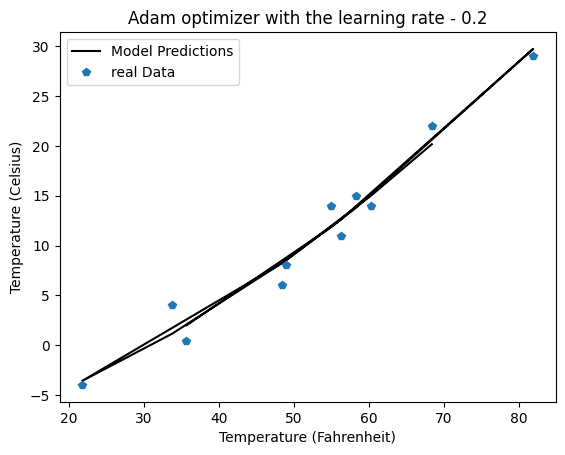

In [71]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')#set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("Adam optimizer with the learning rate - 0.2")
plt.legend() # Add a legend to the plot
plt.show()# to show the plot

In [72]:
t_un = 0.2 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5800,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 77327.1797
Epoch 550, loss 4.1664
Epoch 1100, loss 3.5647
Epoch 1650, loss 3.4791
Epoch 2200, loss 3.3817
Epoch 2750, loss 3.2682
Epoch 3300, loss 3.1449
Epoch 3850, loss 3.0212
Epoch 4400, loss 2.9084
Epoch 4950, loss 2.8175
Epoch 5500, loss 2.7549


tensor([ 0.8101,  0.0941, -8.5341], requires_grad=True)

In [73]:
t_un.numpy()

array([ 7.1400003, 10.9800005, 11.66     , 16.380001 , 11.26     ,
        9.780001 ,  6.7599998,  4.36     ,  9.68     , 12.06     ,
       13.68     ], dtype=float32)

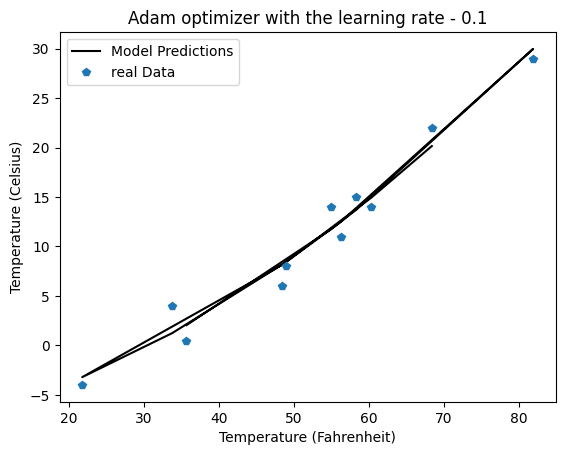

In [74]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')#set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("Adam optimizer with the learning rate - 0.1")
plt.legend()
plt.show()# display the plot

In [75]:
t_un = 0.2 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=6000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 77327.1797
Epoch 550, loss 7.5400
Epoch 1100, loss 6.9487
Epoch 1650, loss 6.3781
Epoch 2200, loss 5.7354
Epoch 2750, loss 5.0914
Epoch 3300, loss 4.5204
Epoch 3850, loss 4.0816
Epoch 4400, loss 3.7977
Epoch 4950, loss 3.6465
Epoch 5500, loss 3.5769


tensor([-0.3406,  0.1460, -2.6385], requires_grad=True)

In [76]:
t_un.numpy()

array([ 7.1400003, 10.9800005, 11.66     , 16.380001 , 11.26     ,
        9.780001 ,  6.7599998,  4.36     ,  9.68     , 12.06     ,
       13.68     ], dtype=float32)

In [77]:
t_p.detach().numpy()

array([ 2.0465822, 11.704301 , 13.703725 , 29.980347 , 12.517055 ,
        8.388177 ,  1.2417574, -3.21355  ,  8.124064 , 14.920508 ,
       20.156384 ], dtype=float32)

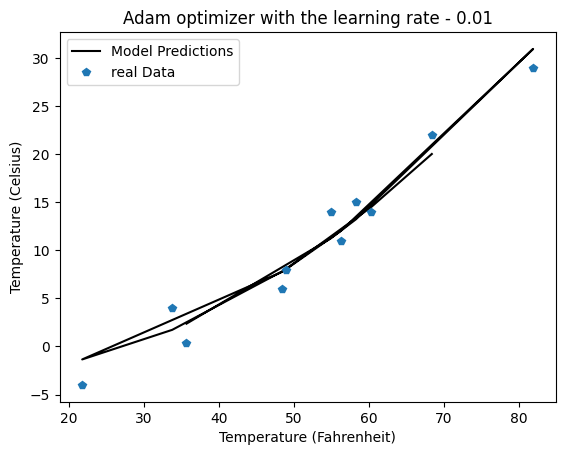

In [78]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')#set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("Adam optimizer with the learning rate - 0.01")
plt.legend()
plt.show()# display the plot

In [79]:
t_un = 0.2 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=6500,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 77327.1797
Epoch 550, loss 41262.5352
Epoch 1100, loss 19497.0703
Epoch 1650, loss 7762.7061
Epoch 2200, loss 2420.2222
Epoch 2750, loss 535.9073
Epoch 3300, loss 78.3320
Epoch 3850, loss 12.3041
Epoch 4400, loss 7.5015
Epoch 4950, loss 7.2760
Epoch 5500, loss 7.1595
Epoch 6050, loss 7.0131


tensor([ 0.0522,  0.1048, -1.0372], requires_grad=True)

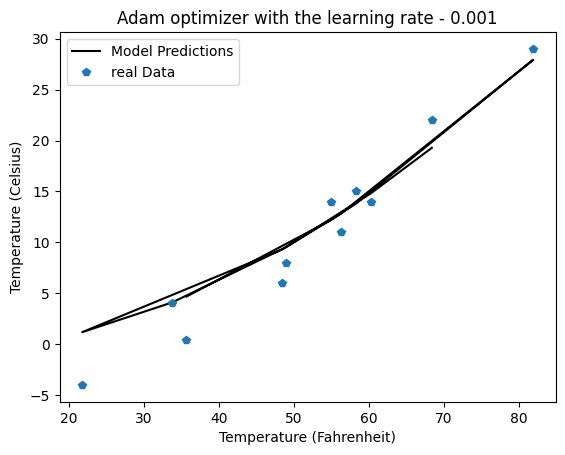

In [80]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')#set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("Adam optimizer with the learning rate - 0.001")
plt.legend()
plt.show()#display the plot

In [81]:
t_un = 0.2 * t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=6800,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 77327.1797
Epoch 550, loss nan
Epoch 1100, loss nan
Epoch 1650, loss nan
Epoch 2200, loss nan
Epoch 2750, loss nan
Epoch 3300, loss nan
Epoch 3850, loss nan
Epoch 4400, loss nan
Epoch 4950, loss nan
Epoch 5500, loss nan
Epoch 6050, loss nan
Epoch 6600, loss nan


tensor([nan, nan, nan], requires_grad=True)

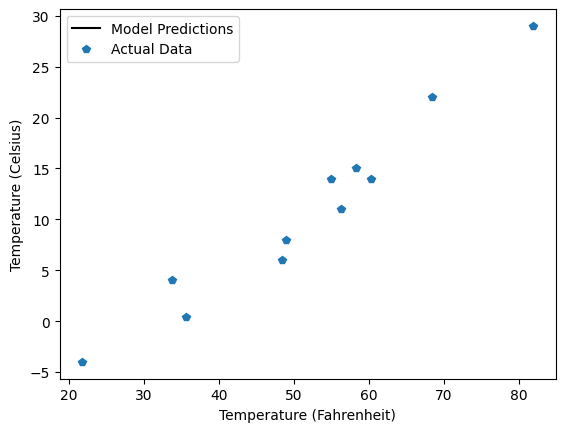

In [82]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')# set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')
plt.legend()
plt.show()# dispay the plot

In [83]:
t_un = t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.000001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=6800,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 46764572.0000
Epoch 550, loss nan
Epoch 1100, loss nan
Epoch 1650, loss nan
Epoch 2200, loss nan
Epoch 2750, loss nan
Epoch 3300, loss nan
Epoch 3850, loss nan
Epoch 4400, loss nan
Epoch 4950, loss nan
Epoch 5500, loss nan
Epoch 6050, loss nan
Epoch 6600, loss nan


tensor([nan, nan, nan], requires_grad=True)

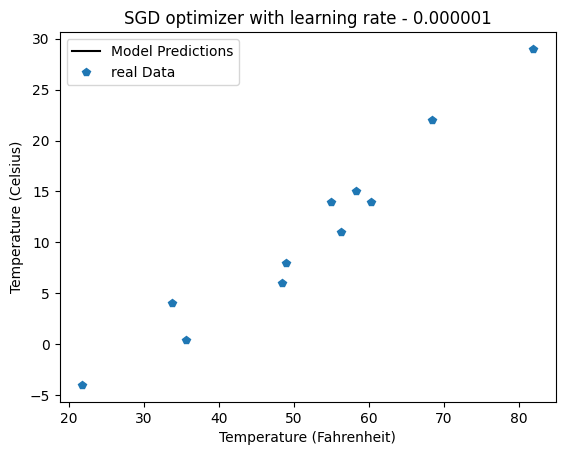

In [84]:
t_p = model(t_un, *params)

plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')# set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')# Plot the real data as points
plt.title("SGD optimizer with learning rate - 0.000001")
plt.legend()
plt.show()#display the plots

In [85]:
t_un = t_u
params = torch.tensor([2.0,2.0,1.0], requires_grad=True)
learning_rate = 0.00000001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=6700,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 46764572.0000
Epoch 550, loss 722.8743
Epoch 1100, loss 720.4872
Epoch 1650, loss 718.1044
Epoch 2200, loss 715.7256
Epoch 2750, loss 713.3508
Epoch 3300, loss 710.9799
Epoch 3850, loss 708.6129
Epoch 4400, loss 706.2499
Epoch 4950, loss 703.8908
Epoch 5500, loss 701.5358
Epoch 6050, loss 699.1850
Epoch 6600, loss 696.8553


tensor([ 1.9244, -0.0262,  0.9979], requires_grad=True)

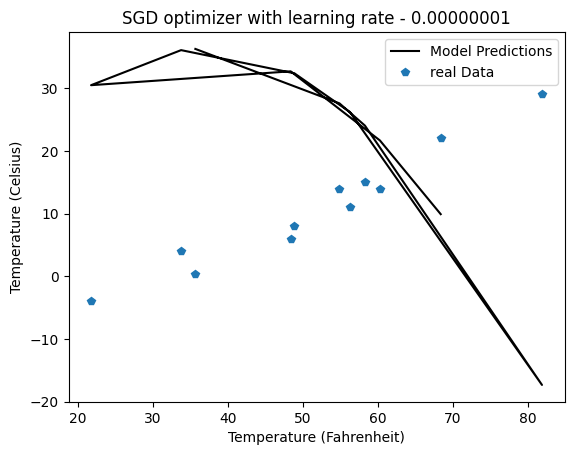

In [86]:
t_p = model(t_un, *params)
plt.figure()
plt.xlabel('Temperature (Fahrenheit)')# set lable on x axis
plt.ylabel('Temperature (Celsius)')# set lable on y axis
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='black', label='Model Predictions')
# Plot the real data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='real Data')
plt.title("SGD optimizer with learning rate - 0.00000001")
plt.legend()
plt.show()# dosplay the plots

In [122]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [123]:
df = pd.read_csv('/opt/google/drive/Housing.csv')

# Display the last 5 rows of the DataFrame
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [124]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [125]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
df[input_features] = scaler_x.fit_transform(df[input_features])
df[[output_feature]] = scaler_y.fit_transform(df[[output_feature]])

In [126]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,0.006061,0.092784,0.2,0.0,0.000000,yes,no,yes,no,no,0.666667,no,unfurnished
541,0.001485,0.051546,0.4,0.0,0.000000,no,no,no,no,no,0.000000,no,semi-furnished
542,0.000000,0.135395,0.2,0.0,0.000000,yes,no,no,no,no,0.000000,no,unfurnished
543,0.000000,0.086598,0.4,0.0,0.000000,no,no,no,no,no,0.000000,no,furnished
544,0.000000,0.151203,0.4,0.0,0.333333,yes,no,no,no,no,0.000000,no,unfurnished


In [127]:
X = df[input_features].values
y = df[[output_feature]].values

In [128]:
def model(X, W, B):
    return torch.sum(X * W, dim=1) + B

In [129]:
def training_loop(n_epochs, optimizer, weights, bias, X_train, X_val, y_train, y_val):
    loss_train = []
    loss_val = []
    for epoch in range(1, n_epochs + 1):
        y_train_p = model(X_train, weights, bias)
        train_loss = loss_fn(y_train_p, y_train)

        y_val_p = model(X_train, weights, bias)
        val_loss = loss_fn(y_val_p, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            loss_train.append(train_loss)
            loss_val.append(val_loss)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return weights, bias, loss_train, loss_val

In [130]:
def model_training(X, y, epochs, optimizer, learning_rate):
  train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train = torch.tensor(train_X)
  y_train =  torch.tensor(train_Y)
  X_val =  torch.tensor(val_X)
  y_val =  torch.tensor(val_Y)

  n_w = X.shape[1]
  weights = torch.tensor([1.0] * n_w, requires_grad=True)
  bias = torch.tensor([0.0], requires_grad=True)
  if optimizer == 'SGD':
    optimizer = optim.SGD([weights, bias], lr=learning_rate)
  elif optimizer == 'ADAM':
    optimizer = optim.Adam([weights, bias], lr=learning_rate)

  w, b, train_loss, val_loss = training_loop(
                                n_epochs = epochs,
                                optimizer = optimizer,
                                weights = weights,
                                bias = bias,
                                X_train = X_train,
                                X_val = X_val,
                                y_train = y_train,
                                y_val = y_val)
  return w, b, train_loss, val_loss

In [131]:
weights_adam_1, bias_adam_1, train_loss_adam_1, val_loss_adam_1 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.1)

Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [132]:
weights_adam_1, bias_adam_1

(tensor([4.3523e-06, 4.4021e-06, 4.0123e-06, 4.2044e-06, 4.1834e-06],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [133]:
weights_adam_01, bias_adam_01, train_loss_adam_01, val_loss_adam_01 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)

Epoch 500, Training loss 0.0266, Validation loss 0.0424
Epoch 1000, Training loss 0.0234, Validation loss 0.0389
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [134]:
weights_adam_01, bias_adam_01

(tensor([ 1.1828e-07,  2.5502e-07, -6.8351e-08, -2.1430e-09,  6.7796e-09],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [135]:
weights_adam_001, bias_adam_001, train_loss_adam_001, val_loss_adam_001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.001)

Epoch 500, Training loss 0.2047, Validation loss 0.2117
Epoch 1000, Training loss 0.1061, Validation loss 0.1239
Epoch 1500, Training loss 0.0719, Validation loss 0.0899
Epoch 2000, Training loss 0.0487, Validation loss 0.0659
Epoch 2500, Training loss 0.0358, Validation loss 0.0524
Epoch 3000, Training loss 0.0297, Validation loss 0.0459
Epoch 3500, Training loss 0.0270, Validation loss 0.0428
Epoch 4000, Training loss 0.0254, Validation loss 0.0411
Epoch 4500, Training loss 0.0244, Validation loss 0.0400
Epoch 5000, Training loss 0.0237, Validation loss 0.0393


In [136]:
weights_adam_001, bias_adam_001

(tensor([ 0.0522,  0.1781, -0.0672, -0.0236, -0.0105], requires_grad=True),
 tensor([0.1860], requires_grad=True))

In [137]:
weights_adam_0001, bias_adam_0001, train_loss_adam_0001, val_loss_adam_0001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)

Epoch 500, Training loss 1.1064, Validation loss 1.0777
Epoch 1000, Training loss 0.9080, Validation loss 0.8847
Epoch 1500, Training loss 0.7402, Validation loss 0.7219
Epoch 2000, Training loss 0.5992, Validation loss 0.5858
Epoch 2500, Training loss 0.4823, Validation loss 0.4735
Epoch 3000, Training loss 0.3869, Validation loss 0.3825
Epoch 3500, Training loss 0.3107, Validation loss 0.3104
Epoch 4000, Training loss 0.2516, Validation loss 0.2551
Epoch 4500, Training loss 0.2072, Validation loss 0.2143
Epoch 5000, Training loss 0.1752, Validation loss 0.1854


In [138]:
weights_adam_0001, bias_adam_0001

(tensor([0.6064, 0.6119, 0.5784, 0.5884, 0.5866], requires_grad=True),
 tensor([-0.3670], requires_grad=True))

In [139]:
weights_sgd_1, bias_sgd_1, train_loss_sgd_1, val_loss_sgd_1 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.1)

Epoch 500, Training loss 0.0235, Validation loss 0.0390
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [140]:
weights_sgd_1, bias_sgd_1

(tensor([ 5.8444e-07,  1.6221e-06, -6.0470e-07, -4.4821e-08,  3.9729e-08],
        requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [106]:
weights_sgd_01, bias_sgd_01, train_loss_sgd_01, val_loss_sgd_01 =  model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)

Epoch 500, Training loss 0.0900, Validation loss 0.1071
Epoch 1000, Training loss 0.0447, Validation loss 0.0610
Epoch 1500, Training loss 0.0326, Validation loss 0.0485
Epoch 2000, Training loss 0.0284, Validation loss 0.0441
Epoch 2500, Training loss 0.0263, Validation loss 0.0420
Epoch 3000, Training loss 0.0252, Validation loss 0.0407
Epoch 3500, Training loss 0.0245, Validation loss 0.0400
Epoch 4000, Training loss 0.0240, Validation loss 0.0395
Epoch 4500, Training loss 0.0237, Validation loss 0.0392
Epoch 5000, Training loss 0.0235, Validation loss 0.0390


In [141]:
weights_sgd_01, bias_sgd_01

(tensor([ 0.0912,  0.0961,  0.0113, -0.0293, -0.0281], requires_grad=True),
 tensor([0.2086], requires_grad=True))

In [142]:
weights_sgd_001, bias_sgd_001, train_loss_sgd_001, val_loss_sgd_001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.001)

Epoch 500, Training loss 0.3233, Validation loss 0.3281
Epoch 1000, Training loss 0.2274, Validation loss 0.2421
Epoch 1500, Training loss 0.1964, Validation loss 0.2136
Epoch 2000, Training loss 0.1733, Validation loss 0.1909
Epoch 2500, Training loss 0.1536, Validation loss 0.1712
Epoch 3000, Training loss 0.1368, Validation loss 0.1543
Epoch 3500, Training loss 0.1223, Validation loss 0.1397
Epoch 4000, Training loss 0.1099, Validation loss 0.1271
Epoch 4500, Training loss 0.0992, Validation loss 0.1163
Epoch 5000, Training loss 0.0900, Validation loss 0.1070


In [143]:
weights_sgd_001, bias_sgd_001

(tensor([0.6123, 0.5272, 0.5757, 0.2545, 0.2784], requires_grad=True),
 tensor([-0.3091], requires_grad=True))

In [144]:
weights_sgd_0001, bias_sgd_0001, train_loss_sgd_0001, val_loss_sgd_0001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)

Epoch 500, Training loss 1.0859, Validation loss 1.0583
Epoch 1000, Training loss 0.8918, Validation loss 0.8700
Epoch 1500, Training loss 0.7430, Validation loss 0.7263
Epoch 2000, Training loss 0.6288, Validation loss 0.6166
Epoch 2500, Training loss 0.5409, Validation loss 0.5326
Epoch 3000, Training loss 0.4732, Validation loss 0.4683
Epoch 3500, Training loss 0.4207, Validation loss 0.4188
Epoch 4000, Training loss 0.3800, Validation loss 0.3806
Epoch 4500, Training loss 0.3482, Validation loss 0.3510
Epoch 5000, Training loss 0.3231, Validation loss 0.3280


In [145]:
weights_sgd_0001, bias_sgd_0001

(tensor([0.8369, 0.7544, 0.8998, 0.7654, 0.7854], requires_grad=True),
 tensor([-0.4963], requires_grad=True))

In [146]:
epochs = range(1, 500 * len(train_loss_sgd_1), 500)
epochs

range(1, 5000, 500)

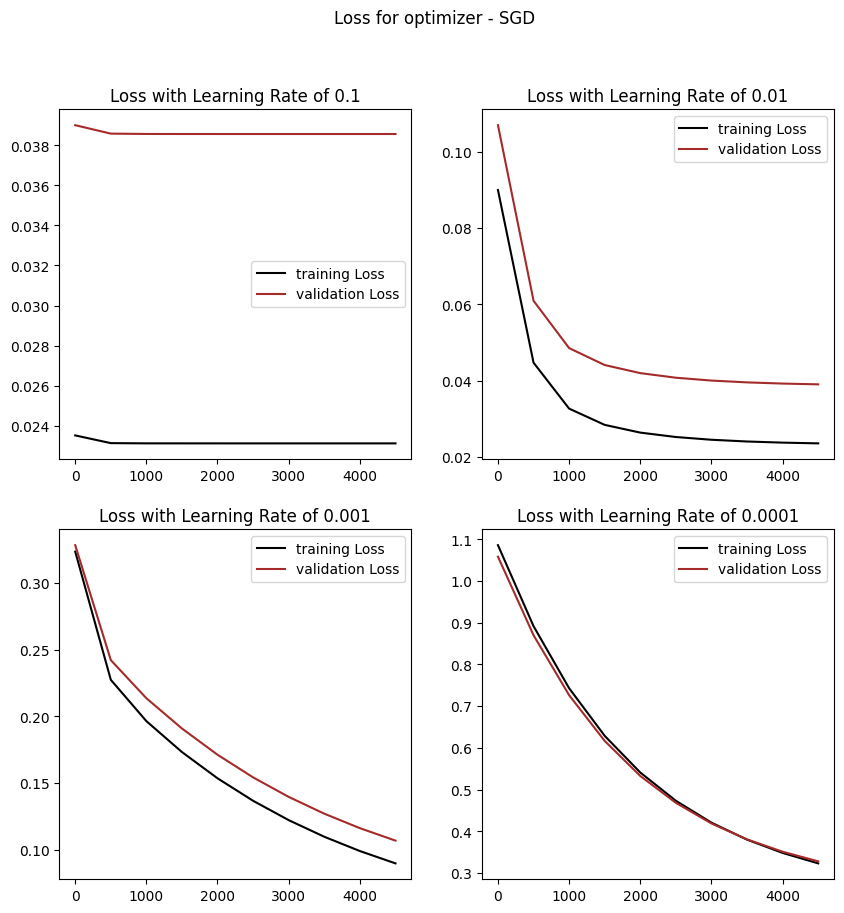

In [147]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_1]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_1]), color='brown', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_01]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_01]), color='brown', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_001]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_001]), color='brown', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_0001]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_0001]), color='brown', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()

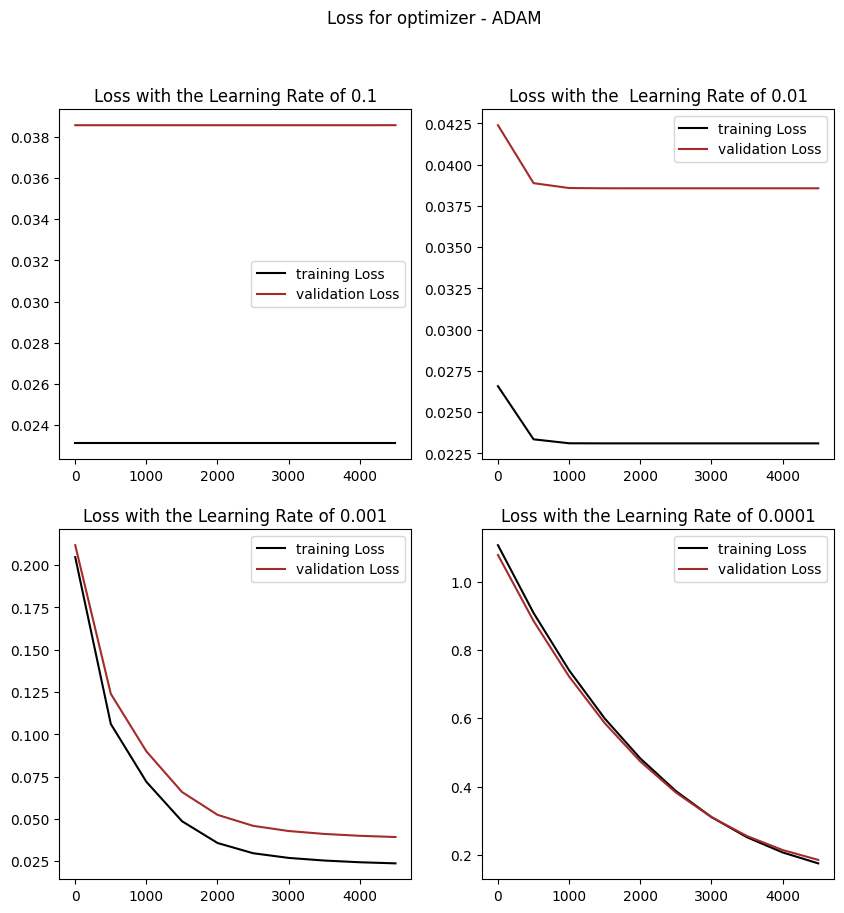

In [149]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer - ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_1]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_1]), color='brown', label = 'validation Loss')
plt.title('Loss with the Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_01]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_01]), color='brown', label = 'validation Loss')
plt.title('Loss with the  Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_001]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_001]), color='brown', label = 'validation Loss')
plt.title('Loss with the Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_0001]), color='black', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_0001]), color='brown', label = 'validation Loss')
plt.title('Loss with the Learning Rate of 0.0001')
plt.legend()

plt.show()

In [150]:
df = pd.read_csv('/opt/google/drive/Housing.csv')

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [151]:
df['furnishingstatus'].value_counts().unique

<bound method Series.unique of semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64>

In [152]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
df = df.drop('furnishingstatus_semi-furnished', axis=1)

In [153]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0,1
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,0,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0,1
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,1,0
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,0,1


In [154]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [155]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   price                         545 non-null    int64
 1   area                          545 non-null    int64
 2   bedrooms                      545 non-null    int64
 3   bathrooms                     545 non-null    int64
 4   stories                       545 non-null    int64
 5   mainroad                      545 non-null    int64
 6   guestroom                     545 non-null    int64
 7   basement                      545 non-null    int64
 8   hotwaterheating               545 non-null    int64
 9   airconditioning               545 non-null    int64
 10  parking                       545 non-null    int64
 11  prefarea                      545 non-null    int64
 12  furnishingstatus_furnished    545 non-null    uint8
 13  furnishingstatus_unfurnished  545 n

In [157]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [158]:
X = df.drop('price', axis = 1)
y = df[['price']]

In [159]:
X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(scaler_y.fit_transform(y), columns=y.columns, index=y.index).values

In [160]:
weights_adam_1, bias_adam_1, train_loss_adam_1, val_loss_adam_1 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.1)

Epoch 500, Training loss 0.0231, Validation loss 0.0386
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [161]:
weights_adam_1, bias_adam_1

(tensor([ 5.4853e-09,  2.0843e-08, -4.5936e-09, -6.5771e-10,  7.4842e-09,
         -3.9867e-10,  1.4340e-09,  1.3484e-09, -2.6016e-10, -1.4452e-10,
         -9.6614e-10,  1.5285e-09,  3.6333e-09], requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [162]:
weights_adam_01, bias_adam_01, train_loss_adam_01, val_loss_adam_01 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.01)

Epoch 500, Training loss 0.0605, Validation loss 0.0784
Epoch 1000, Training loss 0.0353, Validation loss 0.0518
Epoch 1500, Training loss 0.0273, Validation loss 0.0433
Epoch 2000, Training loss 0.0244, Validation loss 0.0401
Epoch 2500, Training loss 0.0234, Validation loss 0.0390
Epoch 3000, Training loss 0.0232, Validation loss 0.0387
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [163]:
weights_adam_01, bias_adam_01

(tensor([-2.0866e-07,  4.0596e-05, -1.0004e-05, -6.8162e-06,  6.8431e-06,
          1.9621e-07, -6.6898e-07,  8.3814e-07, -1.6544e-08, -1.2367e-06,
         -1.3017e-06,  1.0794e-06,  2.2106e-06], requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [164]:
weights_adam_001, bias_adam_001, train_loss_adam_001, val_loss_adam_001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.001)

Epoch 500, Training loss 3.1856, Validation loss 3.1219
Epoch 1000, Training loss 0.4633, Validation loss 0.4578
Epoch 1500, Training loss 0.1503, Validation loss 0.1660
Epoch 2000, Training loss 0.1138, Validation loss 0.1334
Epoch 2500, Training loss 0.0929, Validation loss 0.1122
Epoch 3000, Training loss 0.0768, Validation loss 0.0955
Epoch 3500, Training loss 0.0642, Validation loss 0.0824
Epoch 4000, Training loss 0.0545, Validation loss 0.0721
Epoch 4500, Training loss 0.0469, Validation loss 0.0641
Epoch 5000, Training loss 0.0408, Validation loss 0.0577


In [165]:
weights_adam_001, bias_adam_001

(tensor([ 0.2128,  0.4137, -0.0796,  0.0596,  0.2615, -0.0317,  0.0713,  0.0340,
         -0.0295,  0.0121, -0.0393,  0.0504,  0.1279], requires_grad=True),
 tensor([-0.2757], requires_grad=True))

In [166]:
weights_adam_0001, bias_adam_0001, train_loss_adam_0001, val_loss_adam_0001 = model_training(X, y, epochs = 5000, optimizer = 'ADAM', learning_rate = 0.0001)

Epoch 500, Training loss 13.0457, Validation loss 12.8904
Epoch 1000, Training loss 11.3789, Validation loss 11.2355
Epoch 1500, Training loss 9.8671, Validation loss 9.7352
Epoch 2000, Training loss 8.4970, Validation loss 8.3764
Epoch 2500, Training loss 7.2580, Validation loss 7.1485
Epoch 3000, Training loss 6.1414, Validation loss 6.0428
Epoch 3500, Training loss 5.1404, Validation loss 5.0523
Epoch 4000, Training loss 4.2489, Validation loss 4.1712
Epoch 4500, Training loss 3.4619, Validation loss 3.3943
Epoch 5000, Training loss 2.7748, Validation loss 2.7171


In [167]:
weights_adam_0001, bias_adam_0001

(tensor([0.5580, 0.5592, 0.5553, 0.5571, 0.5588, 0.5530, 0.5554, 0.5571, 0.5542,
         0.5563, 0.5540, 0.5553, 0.5615], requires_grad=True),
 tensor([-0.4394], requires_grad=True))

In [168]:
weights_sgd_1, bias_sgd_1, train_loss_sgd_1, val_loss_sgd_1 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.1)

Epoch 500, Training loss 0.0236, Validation loss 0.0391
Epoch 1000, Training loss 0.0231, Validation loss 0.0386
Epoch 1500, Training loss 0.0231, Validation loss 0.0386
Epoch 2000, Training loss 0.0231, Validation loss 0.0386
Epoch 2500, Training loss 0.0231, Validation loss 0.0386
Epoch 3000, Training loss 0.0231, Validation loss 0.0386
Epoch 3500, Training loss 0.0231, Validation loss 0.0386
Epoch 4000, Training loss 0.0231, Validation loss 0.0386
Epoch 4500, Training loss 0.0231, Validation loss 0.0386
Epoch 5000, Training loss 0.0231, Validation loss 0.0386


In [169]:
weights_sgd_1, bias_sgd_1

(tensor([ 3.3234e-07,  2.1203e-06, -7.5498e-07, -1.5237e-07,  5.3786e-07,
         -1.4389e-08,  7.3909e-08,  1.0228e-07, -6.9081e-09, -1.0148e-08,
         -8.3590e-08,  1.0964e-07,  2.4538e-07], requires_grad=True),
 tensor([0.2560], requires_grad=True))

In [170]:
weights_sgd_01, bias_sgd_01, train_loss_sgd_01, val_loss_sgd_01 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.01)

Epoch 500, Training loss 0.1272, Validation loss 0.1449
Epoch 1000, Training loss 0.0591, Validation loss 0.0757
Epoch 1500, Training loss 0.0386, Validation loss 0.0547
Epoch 2000, Training loss 0.0308, Validation loss 0.0467
Epoch 2500, Training loss 0.0274, Validation loss 0.0431
Epoch 3000, Training loss 0.0257, Validation loss 0.0413
Epoch 3500, Training loss 0.0247, Validation loss 0.0403
Epoch 4000, Training loss 0.0242, Validation loss 0.0397
Epoch 4500, Training loss 0.0238, Validation loss 0.0394
Epoch 5000, Training loss 0.0236, Validation loss 0.0391


In [171]:
weights_sgd_01, bias_sgd_01

(tensor([ 0.0908,  0.1152,  0.0146, -0.0318,  0.0100, -0.0054, -0.0024,  0.0098,
         -0.0027, -0.0278, -0.0067,  0.0036,  0.0068], requires_grad=True),
 tensor([0.1933], requires_grad=True))

In [172]:
weights_sgd_001, bias_sgd_001, train_loss_sgd_001, val_loss_sgd_001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.001)

Epoch 500, Training loss 0.6403, Validation loss 0.6492
Epoch 1000, Training loss 0.4374, Validation loss 0.4575
Epoch 1500, Training loss 0.3470, Validation loss 0.3671
Epoch 2000, Training loss 0.2846, Validation loss 0.3042
Epoch 2500, Training loss 0.2396, Validation loss 0.2586
Epoch 3000, Training loss 0.2057, Validation loss 0.2244
Epoch 3500, Training loss 0.1794, Validation loss 0.1977
Epoch 4000, Training loss 0.1584, Validation loss 0.1765
Epoch 4500, Training loss 0.1413, Validation loss 0.1591
Epoch 5000, Training loss 0.1271, Validation loss 0.1447


In [173]:
weights_sgd_001, bias_sgd_001

(tensor([ 0.5176,  0.4371,  0.5646,  0.2609,  0.0940,  0.0952,  0.0704,  0.6189,
         -0.0675,  0.2547,  0.0814,  0.1967,  0.4130], requires_grad=True),
 tensor([-0.5902], requires_grad=True))

In [174]:
weights_sgd_0001, bias_sgd_0001, train_loss_sgd_0001, val_loss_sgd_0001 = model_training(X, y, epochs = 5000, optimizer = 'SGD', learning_rate = 0.0001)

Epoch 500, Training loss 9.0245, Validation loss 8.9016
Epoch 1000, Training loss 5.5765, Validation loss 5.4878
Epoch 1500, Training loss 3.5477, Validation loss 3.4850
Epoch 2000, Training loss 2.3504, Validation loss 2.3077
Epoch 2500, Training loss 1.6407, Validation loss 1.6132
Epoch 3000, Training loss 1.2170, Validation loss 1.2012
Epoch 3500, Training loss 0.9612, Validation loss 0.9542
Epoch 4000, Training loss 0.8040, Validation loss 0.8038
Epoch 4500, Training loss 0.7050, Validation loss 0.7099
Epoch 5000, Training loss 0.6403, Validation loss 0.6491


In [175]:
weights_sgd_0001, bias_sgd_0001

(tensor([ 0.6591,  0.4947,  0.8329,  0.5950, -0.0886,  0.5903,  0.3723,  0.9077,
          0.3949,  0.6206,  0.5298,  0.5412,  0.6495], requires_grad=True),
 tensor([-1.1368], requires_grad=True))

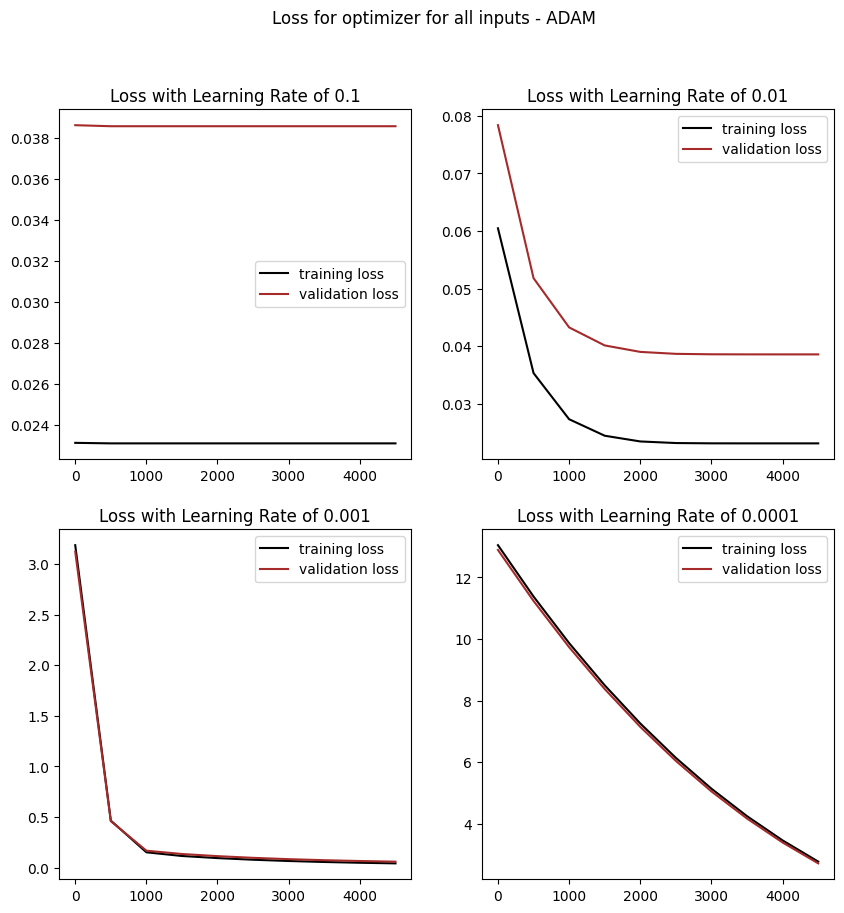

In [176]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer for all inputs - ADAM')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_1]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_1]), color='brown', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_01]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_01]), color='brown', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_001]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_001]), color='brown', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_adam_0001]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_adam_0001]), color='brown', label= 'validation loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()


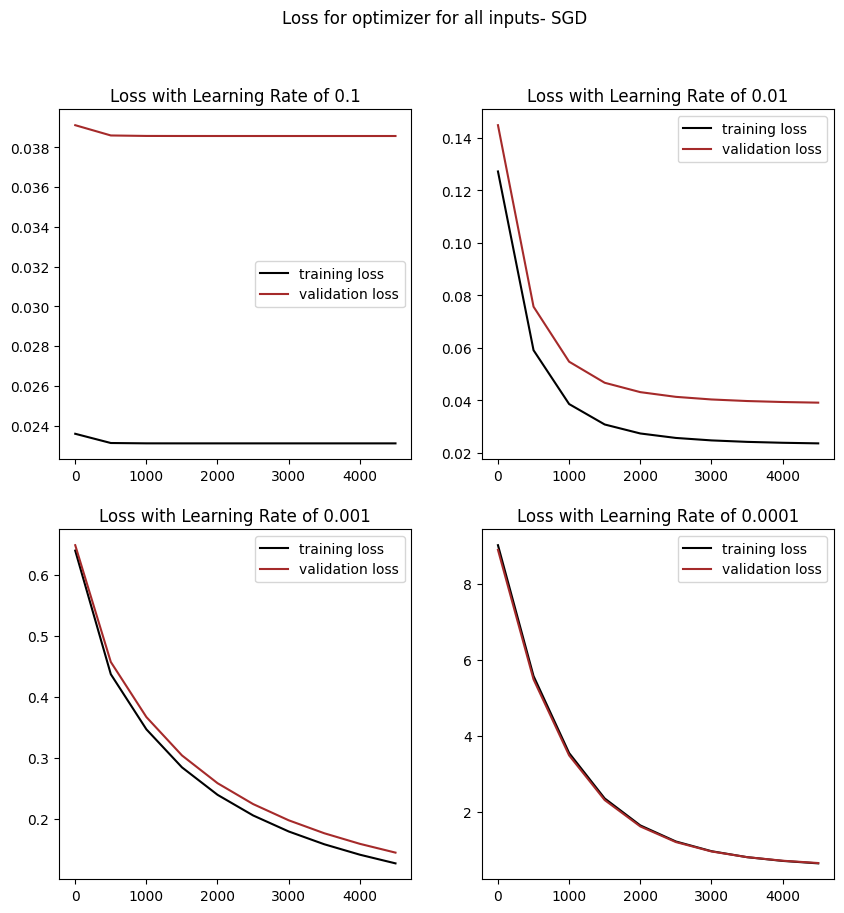

In [177]:
plt.figure(figsize=(10, 10))
plt.suptitle('Loss for optimizer for all inputs- SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_1]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_1]), color='brown', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_01]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_01]), color='brown', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.01')
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_001]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_001]), color='brown', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.001')
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_sgd_0001]), color='black', label= 'training loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_sgd_0001]), color='brown', label = 'validation loss')
plt.title('Loss with Learning Rate of 0.0001')
plt.legend()

plt.show()
